# Script de base

In [1]:
#!/usr/bin/env python3
import numpy as np
import cv2 as cv

if __name__ == "__main__":
    filename = "video-mecanique.mp4"
    # ouverture de la vidéo
    cap = cv.VideoCapture(filename)
    # si l'ouverture ne marche pas, on affiche un message d'erreur
    if not cap.isOpened():
        print("Unable to open: {}".format(filename))
        exit(0)

    # Tant qu'il y a une image à lire, on la lit
    while cap.isOpened():
        ret, frame = cap.read()
        # s'il y a une erreur ou que l'on est à la fin, on arrête la boucle
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        window_name = "frame"
        # Affichage de l'image
        window = cv.imshow(window_name, frame)
        # Pour essayer de passer la fenêtre à l'avant plan
        cv.setWindowProperty(window_name, cv.WND_PROP_TOPMOST, 1)

        if cv.waitKey(1) == ord("q"):
            break
    cap.release()  # fermeture de la vidéo
    cv.destroyAllWindows()  # fermeture de la fenêtre

Can't receive frame (stream end?). Exiting ...


# Script pour limiter le nombre d'image et les enregistrer.

In [2]:
#!/usr/bin/env python3
import numpy as np
import cv2 as cv
import os

if __name__ == "__main__":
    filename = "video-mecanique.mp4"
    # ouverture de la vidéo
    cap = cv.VideoCapture(filename)
    # si l'ouverture ne marche pas, on affiche un message d'erreur
    if not cap.isOpened():
        print("Unable to open: {}".format(filename))
        exit(0)

    # On se place à la 100ième image
    cap.set(cv.CAP_PROP_POS_FRAMES, 105)

    frame_number = 0
    # Tant qu'il y a une image à lire, on la lit
    while cap.isOpened() and frame_number < 57:
        ret, frame = cap.read()
        # s'il y a une erreur ou que l'on est à la fin, on arrête la boucle
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Affichage de l'image
        window = cv.imshow("frame", frame)
        if not os.path.exists("./frames"):
            os.mkdir("frames")

        cv.imwrite("frames/frame-{:04d}.jpg".format(frame_number), frame)

        if cv.waitKey(1) == ord("q"):
            break

        # On incrémente le compteur d'image pour pouvoir arrêter
        frame_number += 1
    cap.release()  # fermeture de la vidéo
    cv.destroyAllWindows()  # fermeture de la fenêtre

# Lecture de l'image et soustraction de l'arrière plan

In [3]:
#!/usr/bin/env python3
import numpy as np
import cv2 as cv
import os

if __name__ == "__main__":

    # create Background Subtractor objects
    backSub = cv.createBackgroundSubtractorMOG2(history=500, detectShadows=False)

    for i in range(57):
        frame = cv.imread(
            "frames/frame-{:04d}.jpg".format(i),
            cv.IMREAD_UNCHANGED,
        )

        # soustraction du fond
        fgMask = backSub.apply(frame)

        # on enlève le bruit
        # fgMask = cv.fastNlMeansDenoising(fgMask,h=40,templateWindowSize=21)

        # création d'un flou sur une zone de 5 par 5 pixels
        fgMask = cv.blur(fgMask, (10, 10))
        # On convertit tous les pixels gris (RGB < 250,250,250) en noir, le reste est converti en blanc.
        (thresh, fgMask) = cv.threshold(fgMask, 250, 255, cv.THRESH_BINARY)

        # enregistrement des images traitées
        cv.imwrite("frames/frame-treatead-{:04d}.png".format(i), fgMask)
        window = cv.imshow("frame", fgMask)

        if cv.waitKey(1) == ord("q"):
            cv.destroyAllWindows()
            break
    cv.destroyAllWindows()

# Détection de la position du ballon

x 1191.75,y 528.75,r 27.349998474121094
1 1
x 1143.75,y 465.75,r 13.850000381469727
2 1
x 1137.75,y 452.25,r 12.350000381469727
3 1
x 1128.75,y 441.75,r 13.100000381469727
4 1
x 1121.25,y 426.75,r 12.5
5 1
x 1118.25,y 416.25,r 12.5
6 1
x 1110.75,y 402.75,r 10.850000381469727
7 1
x 1104.75,y 387.75,r 9.200000762939453
8 1
x 1097.25,y 378.75,r 12.799999237060547
9 1
x 1089.75,y 366.75,r 11.450000762939453
10 1
x 1080.75,y 356.25,r 8.75
11 1
x 1076.25,y 348.75,r 11.450000762939453
12 1
x 1071.75,y 336.75,r 9.799999237060547
13 2
x 1062.75,y 329.25,r 12.950000762939453
14 2
x 1058.25,y 320.25,r 12.950000762939453
15 2
x 1050.75,y 309.75,r 11.149999618530273
16 2
x 1043.25,y 302.25,r 10.700000762939453
17 2
x 1038.75,y 291.75,r 9.649999618530273
18 2
x 1029.75,y 288.75,r 11.149999618530273
19 2
x 1022.25,y 279.75,r 12.799999237060547
20 2
x 1017.75,y 272.25,r 12.799999237060547
21 2
x 1011.75,y 266.25,r 12.049999237060547
22 2
x 1005.75,y 258.75,r 12.5
23 2
x 999.75,y 255.75,r 13.3999996185

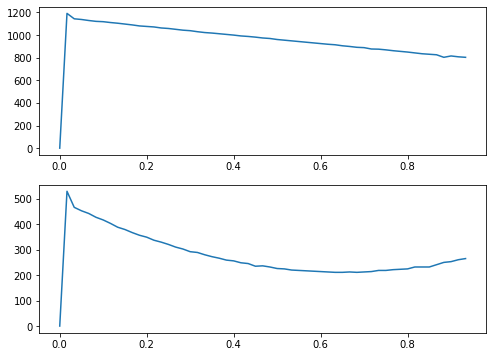

[1303.78089609   79.20227269   14.7732867    13.82931669   16.77050983
   10.92016483   15.44344521   16.15549442   11.71537451   14.1509717
   13.82931669    8.74642784   12.81600562   11.71537451   10.0623059
   12.9034879    10.60660172   11.42365966    9.48683298   11.71537451
    8.74642784    8.48528137    9.60468636    6.70820393   10.60660172
    5.40832691   12.09338662    7.64852927    6.36396103   10.81665383
    6.18465844    7.5           6.18465844    6.18465844    6.18465844
    6.18465844    6.18465844    4.74341649    9.            6.18465844
    7.64852927    3.35410197   12.09338662    4.74341649    6.
    8.07774721    6.18465844    6.18465844   10.60660172    7.5
    4.5          10.0623059    24.23324163   12.36931688   10.60660172
    6.36396103]


In [4]:
#!/usr/bin/env python3
import numpy as np
import cv2 as cv
import os
import matplotlib
import matplotlib.pyplot as plt


if __name__ == "__main__":

    # creation d'un tableau numpy pour stocker la position du centre du ballon
    object_positions = np.zeros((57, 2))

    # treatment of previously treated frames
    for i in range(1, 57):
        frame = cv.imread(
            "frames/frame-treatead-{:04d}.png".format(i),
            cv.IMREAD_UNCHANGED,
        )

        circles = cv.HoughCircles(
            frame,
            cv.HOUGH_GRADIENT,
            dp=1.5,
            param2=1,
            minDist=200,
            minRadius=2,
            maxRadius=35,
        )  # dp = 100, param2 =10, param1 = 500 ,

        # ensure at least some circles were found
        if circles is not None:
            # if only one circle found, we assume that this is the correct one
            if len(circles[0]) == 1:
                object_positions[i] = circles[0, 0, 0:2]
                print("x {},y {},r {}".format(*circles[0, 0, :]))
            # As a matter of fact, always using the first center found is enough and
            # the treatment of cases where we have more than one circle is useless
            elif len(circles[0]) > 1:
                """
                if more than one circle is found, we compute the norm with the previous center found
                to see if the movement is below 1 pixels
                """
                correct_circle = 0
                for circle in circles[0]:
                    correct_circle = 0
                    if (
                        np.linalg.norm(circle[0:2] - object_positions[i - 1, :], axis=0)
                        < 15
                    ):
                        object_positions[i] = circle[0:2]
                        correct_circle += 1
                        # print('circle {}'.format(circle))
                        print("x {},y {},r {}".format(*circle[:]))

                if correct_circle > 1:
                    print("##### warning #######")

            # convert the (x, y) coordinates and radius of the circles to integers
            circles = np.round(circles[0, :]).astype("int")
            # loop over the (x, y) coordinates and radius of the circles
            print(i, len(circles))

            for (x, y, r) in circles:
                # draw the circle in the output image, then draw a rectangle
                # corresponding to the center of the circle
                cv.circle(frame, (x, y), r, (0, 255, 0), 4)
                cv.rectangle(frame, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)
        else:
            print("No circle found")

        # enregistrement des images traitées
        cv.imwrite("frames/frame-position-{:04d}.png".format(i), frame)
        window = cv.imshow("frame", frame)

        if cv.waitKey(1) == ord("q"):
            cv.destroyAllWindows()
            break
    cv.destroyAllWindows()

    # création des abscisses temporelles
    ts = 1 / 60.0 * np.arange(57)

    fig = plt.figure(figsize=(8, 6))
    gs = fig.add_gridspec(2, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1, 0])

    ax1.plot(ts, object_positions[:, 0])
    ax2.plot(ts, object_positions[:, 1])
    plt.show()

    # Les trois premiers points sont aberrants, on va donc les enlever

    np.savetxt(
        "positions.csv",
        np.transpose([ts[3:], object_positions[3:, 0], object_positions[3:, 1]]),
        delimiter=";",
    )

    # calcul de la norme des déplacements et affichage
    print(np.linalg.norm(object_positions[1:] - object_positions[0:-1], axis=1))

# Évaluation du champ de pesanteur

champ de pesanteur : 9.25


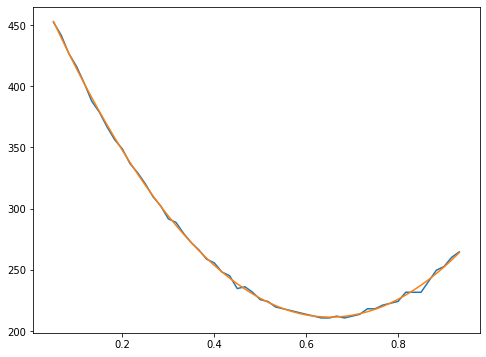

In [5]:
#!/usr/bin/env python3
import numpy as np
import cv2 as cv
import os
import numpy.polynomial.polynomial as poly

if __name__ == "__main__":
    data = np.genfromtxt("positions.csv", delimiter=";", names=["t", "x", "y"])

    fig = plt.figure(figsize=(8, 6))
    gs = fig.add_gridspec(1, 1)
    ax1 = fig.add_subplot(gs[0, 0])

    ax1.plot(data["t"], data["y"])

    coeffs = poly.polyfit(data["t"], data["y"], deg=2)
    y_mod = poly.polyval(data["t"], coeffs)
    print("champ de pesanteur : {:.2f}".format(coeffs[2] * 0.00694 * 2))
    # coeffs = np.polyfit(data['t'],data['y'],deg=2)
    # y_mod = np.polyval(coeffs,data['t'])
    # print(coeffs[0]*0.00694*2)

    ax1.plot(data["t"], y_mod)
    plt.show()

    # On mesure que la règle fait 288 pixels pour deux mètres donc un pixel fait 0.00694 mètre

In [58]:
2 / 286

0.006993006993006993